In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
#percentage of missing values in each column
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
#percentage of missing values in rows
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

***cnt - total rental bikes (casual+registered) for that day**

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_dup = df.copy()
#checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

Data Cleaning

In [7]:
bike_dummy=df.iloc[:,1:16]

In [8]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
05-01-2018    1
             ..
27-12-2019    1
28-12-2019    1
29-12-2019    1
30-12-2019    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
10.899153    5
26.035000    5
17.937500    4
26.615847    4
28.563347    4
            ..
14.862500    1
13.530000    1
9.483464     1
11.943464    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

Removing redundant & unwanted columns

In [9]:
bike_new=df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

In [10]:
bike_new.info()

<class 'pandas.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Creating Dummy Variables

In [11]:
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [12]:
bike_new.info()

<class 'pandas.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 48.8 KB


In [13]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()



<class 'pandas.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    bool   
 19

In [14]:
bike_new.shape

(730, 30)

**SPLITTING DATA**

In [15]:
#We will be doing train and test with ratio 70:30
bike_new.info()

<class 'pandas.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    bool   
 19

In [16]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)


In [17]:
df_train.info()

<class 'pandas.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    bool   
 19  m

In [18]:
df_train.shape


(510, 30)

In [19]:
df_test.shape

(219, 30)

**EXPLORATORY DATA ANALYSIS**
We need to eda to train dataset

**Visualising Numeric variables**
Let's make a pairplot of all the numeric variables.

In [20]:
df_train.info()


<class 'pandas.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    bool   
 19  m

In [21]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='str')

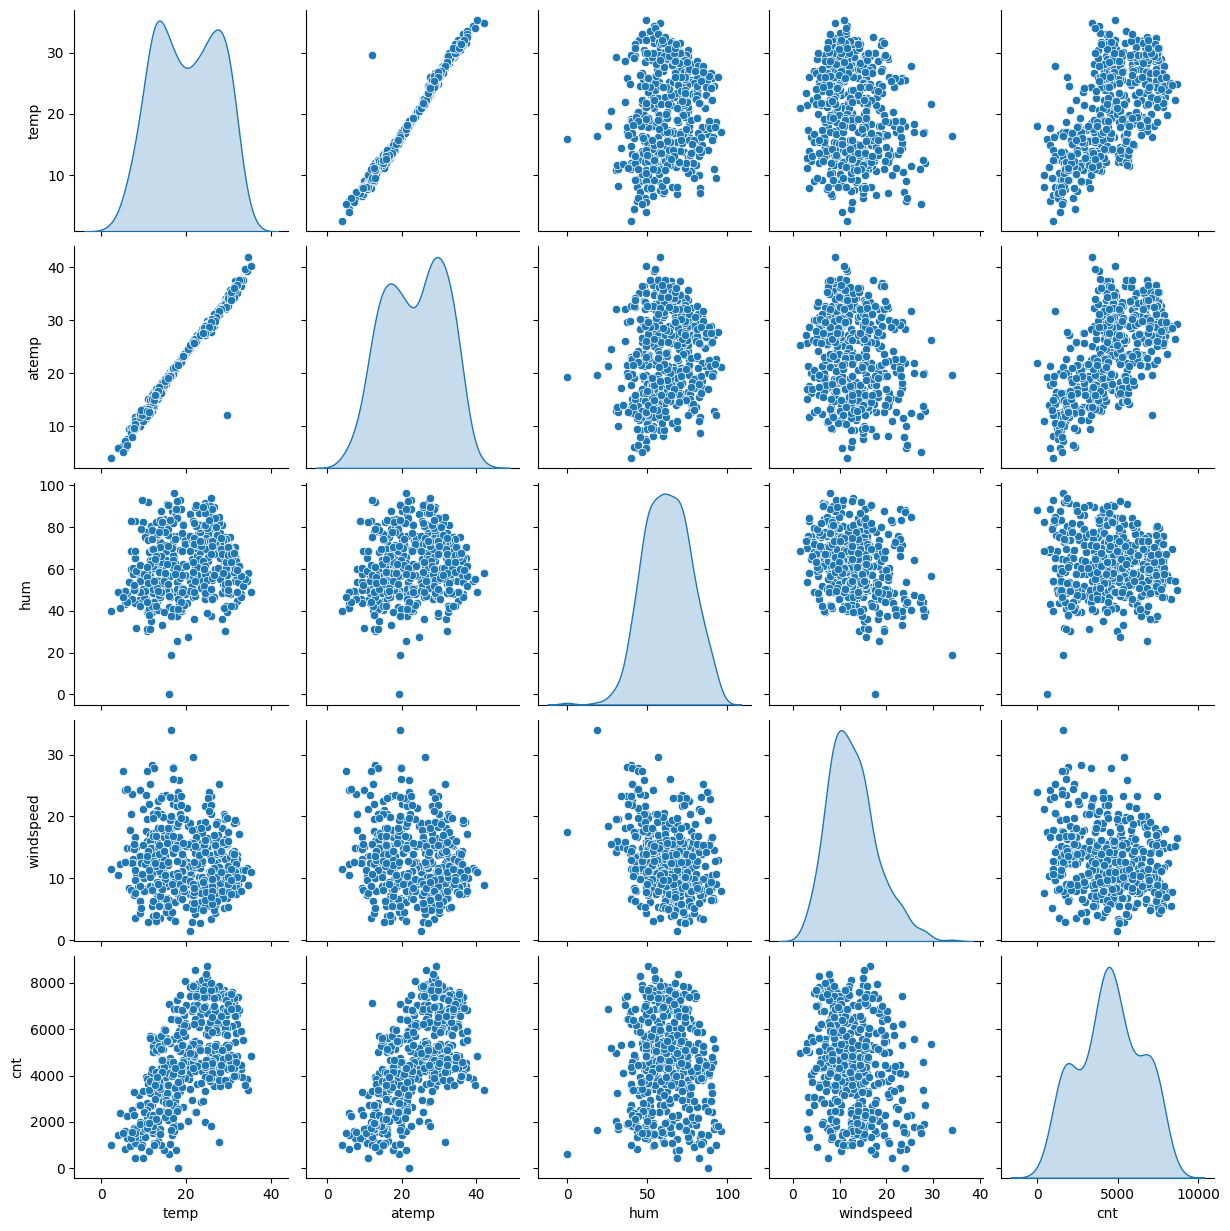

In [22]:
# Create a new dataframe of only numeric variables:
import seaborn as sns
bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

Above pair plot givesus reation between 'temp','atemp' and 'cnt'

Visualising categorical values

In [23]:
df_train.info()

<class 'pandas.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    bool   
 19  m

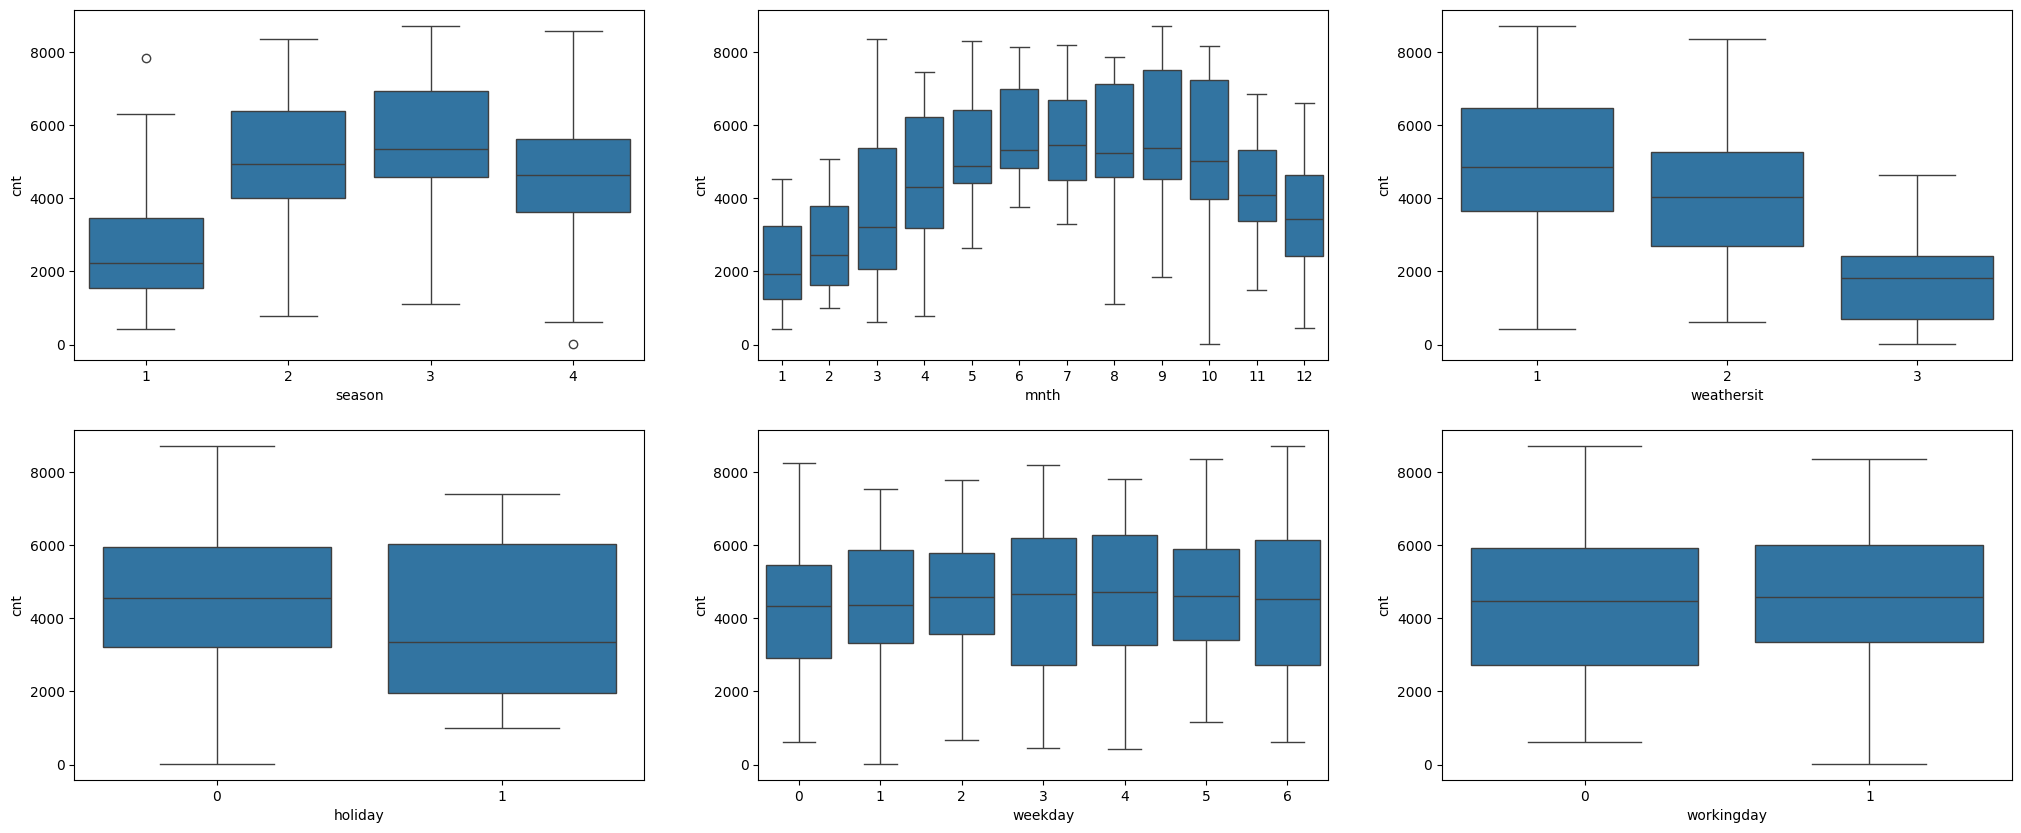

In [24]:
# Building boxplot of all categorical variables  againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt',data=df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt',data=df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt',data=df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt',data=df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt',data=df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt',data=df)
plt.show()

**Insights**

There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

**season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

**weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

**holiday**: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**weekday**: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

**workingday**: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

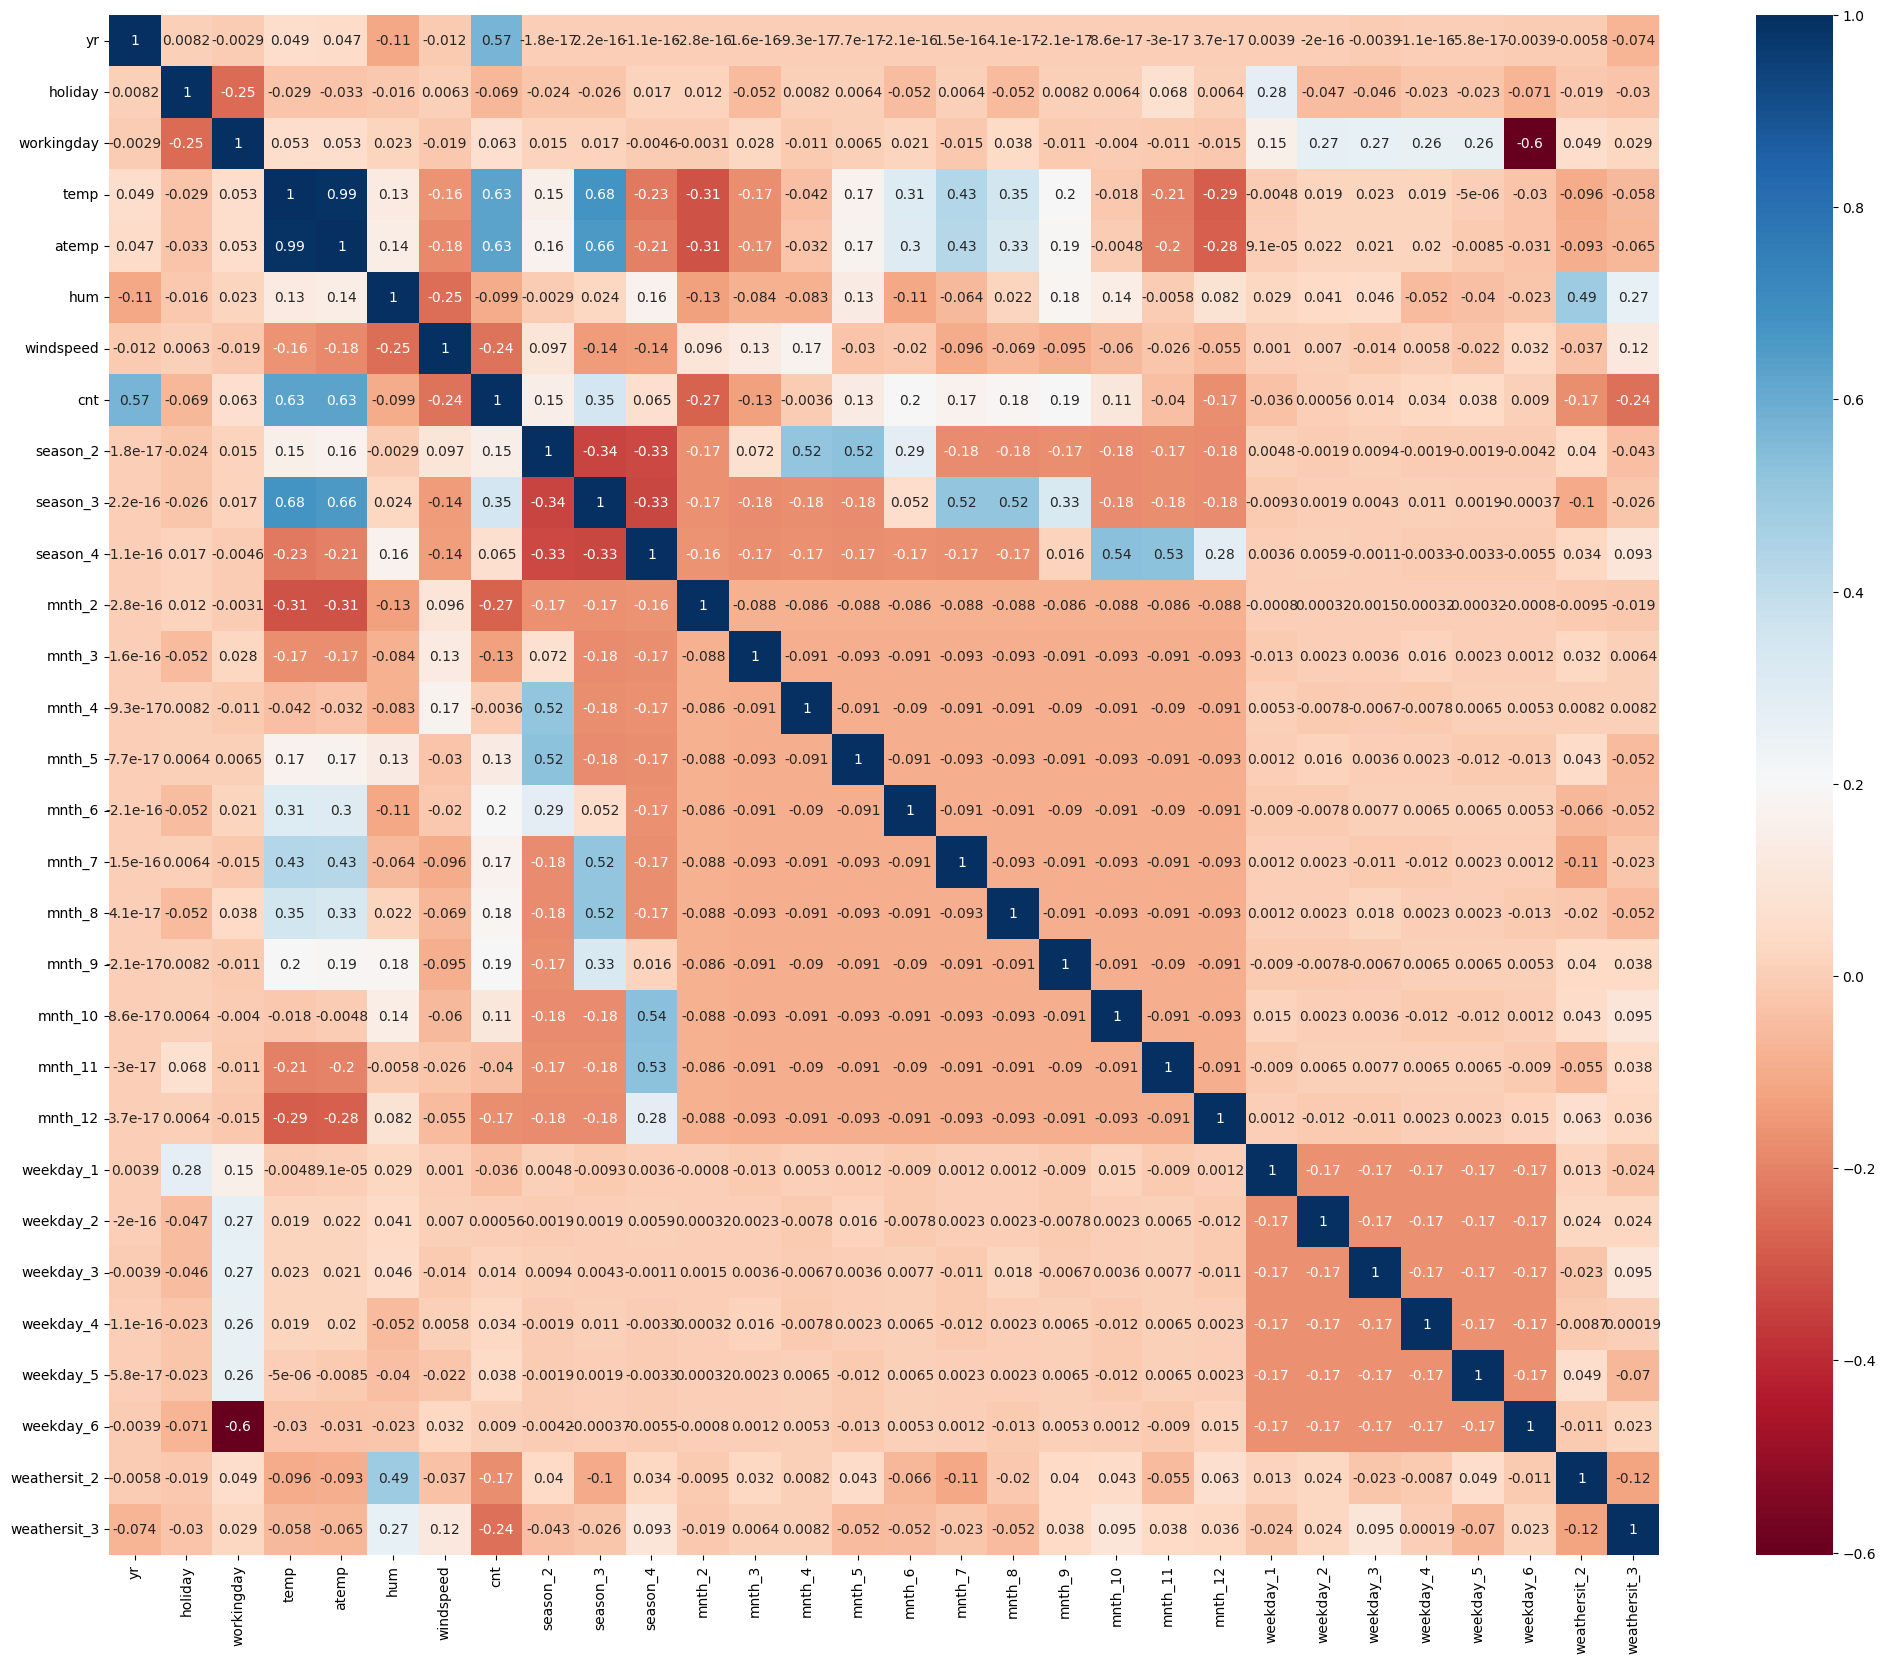

In [25]:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

TRAINING THE MULTIPLE LINEAR REGRESSION MODEL

In [26]:
x = df[['temp','atemp','holiday','windspeed','season','mnth','weekday','weathersit']]
y = df['cnt']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(
    x,y,test_size=0.2,random_state=100
)

In [28]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Prediction on the test

In [29]:
y_pred_mlr_test = mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr_test))

Prediction for test set: [5009.96766134 6474.06705166 4561.39820171 6508.62998241 5650.61551333
 3077.23758572 6353.94787775 5362.28796399 5115.59667862 6932.25665559
 5991.56045299 5803.4356406  5185.26053963 4683.84553045 3400.61675743
 6326.57726646 6412.71446586 2306.76782476 4209.48038678 3555.6926958
 6605.98685992 5629.6022413  5986.24145033 2262.06141352 4335.71874846
 3500.38486874 6382.11241284 5033.7122724  5456.17279845 6299.13250871
 6978.84818951 5210.63386778 5092.81482087 4369.63044578 3494.08127487
 5266.07962021 6295.28133097 5402.0108192  2117.67798846 2542.55003931
 3540.91845023 4469.2673242  4772.10063914 7509.42516702 3743.98883141
 6644.47909516 2424.05519771 5551.44663316 3505.52283429 3412.55749028
 5643.65149722 5621.53877836 4194.35975754 5776.14224586 2051.01276484
 7033.19393055 3874.25153924 3397.49866085 3166.10561268 4694.58742183
 3554.49595148 6249.21829967 2980.97841247 6396.83677342 3204.63275786
 5584.03206596 6499.67081119 4182.01297077 4860.51252

Prediction on train set

In [30]:
y_pred_mlr_train = mlr.predict(x_train)
print("Prediction of train set {}".format(y_pred_mlr_train))

Prediction of train set [1806.3115168  5241.86117064 3154.87278951 3863.9152757  2116.54191669
 2164.13534571 3922.1020729  5094.77062744 6791.77267319 3928.22138572
  438.87681117 5037.03841983 6016.62826924 6209.8262125  3179.77840104
 6414.46561339 4737.34140563 4477.02748716 5702.49326282 4506.84362243
 6223.14876337 5320.78069755 4954.04721599 5783.89395422 5697.02363257
 5674.32020147 5910.33835196 4060.45890972 5702.56877712 5504.0835673
 4422.83613956 6768.00269329 3483.37452044 5792.06724652 4963.41753511
 6217.77344325 6665.96184199 5220.31022603 5677.5427008  2387.94290577
 3731.86918212 5906.43934689 6415.70561631 4239.45563157 5738.42633331
 1463.01902029 1867.45606996 4661.03853215 6441.33980625 3126.88427587
 2173.74309403 4398.98526251 3174.18959733 3882.30481328 2969.02633994
 5006.21866643 1225.34491733 2596.04561034 4017.82147743 5769.59654914
 5425.01267983 2848.86764773 2470.98704974 5071.26908615 2641.51096103
 4320.46637392 5591.18304689 5797.10872431 2044.393569

MSE(Mean Squared error)

In [31]:
#test mse
from sklearn.metrics import mean_squared_error
test_mse  = mean_squared_error(y_test,y_pred_mlr_test)
print(f"Test mse:{test_mse:.4f}")

Test mse:2048353.0984


In [32]:
#train mse
train_mse = mean_squared_error(y_train,y_pred_mlr_train)
print(f"Train mse:{train_mse:.4f}")


Train mse:1779635.9383


RMSE (Root mean square error)

In [33]:
#test rmse
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE:{test_rmse:.4f}")

Test RMSE:1431.2069


In [34]:
#train rmse
train_rmse = np.sqrt(train_mse)
print(f"Train RMSE:{train_rmse:.4f}")

Train RMSE:1334.0300


Hence test rmse > train rmse so it is an overfitting

**PLOTTING**

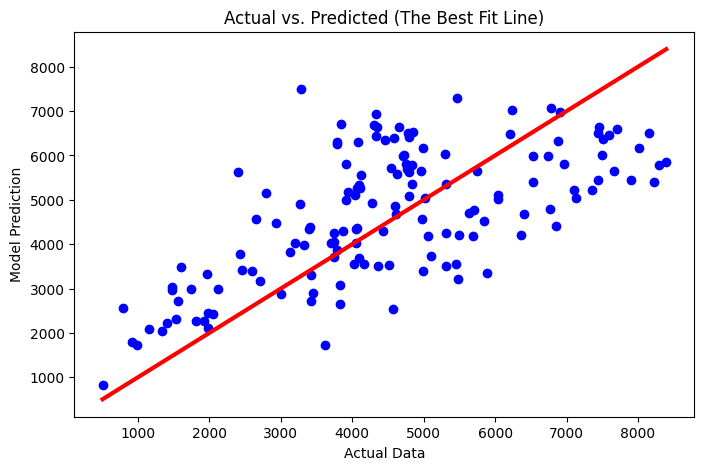

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_mlr_test,color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)

# 3. Label it
plt.xlabel('Actual Data')
plt.ylabel('Model Prediction')
plt.title('Actual vs. Predicted (The Best Fit Line)')

plt.show()